In [1]:
from helper_fun import *

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2
Using tensorflow version: 2.5.0-rc2


### Basic architecture of a [CNN](https://poloclub.github.io/cnn-explainer/#:~:text=A%20convolutional%20neural%20network%2C%20or%20CNN%20for%20short%2C,each%20with%20their%20own%20learnable%20weights%20and%20biases.)


For this exercise we are using dataset available at [pizza_steak](https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip)


| Hyperparameter/Layer type | Description |
|:-------------------------:|-------------|
|   Input image(s)          | Images for discovering pattern |
|   Input layer             | Takes in target image and preprocess them for further layers     |
|   Convolution layer       | Extracts/Learns most importand patterns from images    |
|   Hidden activation       | Adds non-linearity to learned features       |
|   Pooling layer           | Reduces the dimensionality of learned image features        |
|   Fully connected layer   | Further refines learned features from convolution layers      |
|   Output layer            | Takes learned features and outputs them in shape of target labels       |
|   Output activation       | Adds non-linearity to output layer      |



_It's typically a stack of convolution layer and pooling layers_


| Hyperparameter name  | What does it do? |
|:--------------------:|-------------|
|   Filters            | Decides how many filters should pass over input tensor |
|   Kernel Size        | Determines the shape of filters over output (lower values learn bettern features) |
|   Padding            | Pads the input tensor with zeros (if "same") to preserver input shape or leaves in the target tensor as if "valid" lowering output shape |
|   Strides            | Number of steps a filter takes across an image at a time |





In [2]:
# Inspect the data

import pathlib

data_dir = pathlib.Path('pizza_steak/train/')
class_names = np.array(sorted([f.name for f in data_dir.glob('*')]))

class_names

array(['pizza', 'steak'], dtype='<U5')

In [3]:
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
    
#     target_class = random.sample(list(class_names), 1)[0]
    
    target_folder = os.path.join(target_dir, target_class)
    

    image_path = random.sample(os.listdir(target_folder), 1)[0]
    img = mpimg.imread(os.path.join(target_folder, image_path))
#     img = img/255.0
    plt.imshow(img)
    plt.title(f'{target_class}: {image_path}')
    plt.axis('off')
    plt.show()
    
    print(f'Image shape: {img.shape}') # Show the shape of image

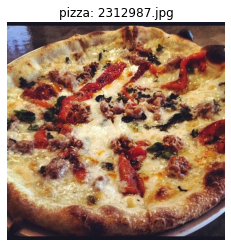

Image shape: (512, 512, 3)


In [4]:
view_random_image('pizza_steak/train/', 'pizza')

## Steps:

* Load our images
* Preprocess our images
* Build a CNN to find patterns in our images
* Compile the CNN model
* Fit the CNN model to our training data

In [5]:
# Set the seed
tf.random.set_seed(42)

# Initalize datagenerator and set it to rescale the pixel values 1/255
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale= 1./255)
val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale= 1./255)

# Setup path to our training samples
train_dir = 'pizza_steak/train/'
val_dir = 'pizza_steak/test/'

# Import data from directory and turn it into batches
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                              batch_size = 32,
                                              target_size = (244, 244),
                                              class_mode = 'binary',
                                              seed = 42)

val_data = val_datagen.flow_from_directory(directory = val_dir,
                                              batch_size = 32,
                                              target_size = (244, 244),
                                              class_mode = 'binary',
                                              seed = 42)


# Build CNN model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters = 10, kernel_size = 3, activation = 'relu', input_shape = (244, 244, 3)),
    tf.keras.layers.Conv2D(10, 3, activation = 'relu'),
    tf.keras.layers.MaxPool2D(pool_size = 2, padding = 'valid'),
    
    tf.keras.layers.Conv2D(10, 3, activation = 'relu'),
    tf.keras.layers.Conv2D(10, 3, activation = 'relu'),
    tf.keras.layers.MaxPool2D(2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
    
])

# Compile the model
model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ['accuracy'])



Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [9]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 242, 242, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 240, 240, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 120, 120, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 118, 118, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 116, 116, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 58, 58, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 33640)             0

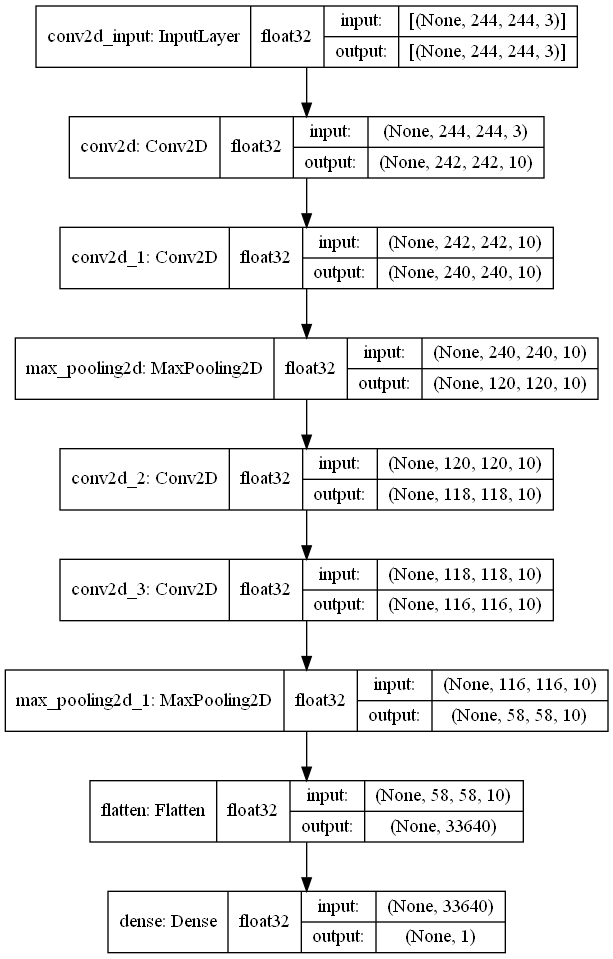

In [10]:
tf.keras.utils.plot_model(model_1, show_shapes= True, show_dtype= True)

In [11]:
# Fit the model
history_1 = model_1.fit(train_data, 
                        epochs = 5,
                        steps_per_epoch=len(train_data),
                        validation_data= val_data,
                        validation_steps=len(val_data))

Epoch 1/5
47/47 [==============================] - 57s 1s/step - loss: 0.5793 - accuracy: 0.6840 - val_loss: 0.4099 - val_accuracy: 0.8380
Epoch 2/5
47/47 [==============================] - 55s 1s/step - loss: 0.4234 - accuracy: 0.8180 - val_loss: 0.3331 - val_accuracy: 0.8660
Epoch 3/5
47/47 [==============================] - 54s 1s/step - loss: 0.3809 - accuracy: 0.8380 - val_loss: 0.3718 - val_accuracy: 0.8440
Epoch 4/5
47/47 [==============================] - 51s 1s/step - loss: 0.3545 - accuracy: 0.8453 - val_loss: 0.3206 - val_accuracy: 0.8520
Epoch 5/5
47/47 [==============================] - 50s 1s/step - loss: 0.2815 - accuracy: 0.8813 - val_loss: 0.3166 - val_accuracy: 0.8520


In [27]:
model_1.evaluate(val_data)

16/16 [==============================] - 3s 177ms/step - loss: 0.3353 - accuracy: 0.8540


[0.3352750837802887, 0.8539999723434448]

### Building Non-CNN model on our data and comparing it with CNN model

2 hidden layer (4 units each) model

In [49]:
# Set random seed
tf.random.set_seed(42)

# Build the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (244, 244, 3)),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
    
])

model_2.compile(loss = tf.keras.losses.BinaryCrossentropy(),
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ['accuracy'])

# Fit the model
history_2 = model_2.fit(train_data, 
                        epochs = 5,
                        steps_per_epoch=len(train_data),
                        validation_data= val_data,
                        validation_steps=len(val_data))

Epoch 1/5
47/47 [==============================] - 10s 205ms/step - loss: 1.1255 - accuracy: 0.5013 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 8s 175ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 7s 150ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 7s 149ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 7s 153ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [29]:
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 178608)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 714436    
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 5         
Total params: 714,461
Trainable params: 714,461
Non-trainable params: 0
_________________________________________________________________


**Previous model was just guessing on the validation data, let's try and compilcate the model(increase layers and units in each layers)**

In [50]:
# Set random seed
tf.random.set_seed(42)

# Build the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (244, 244, 3)),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
    
])

model_3.compile(loss = tf.keras.losses.BinaryCrossentropy(),
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ['accuracy'])

# Fit the model
history_3 = model_3.fit(train_data, 
                        epochs = 5,
                        steps_per_epoch=len(train_data),
                        validation_data= val_data,
                        validation_steps=len(val_data))

Epoch 1/5
47/47 [==============================] - 11s 217ms/step - loss: 3.7774 - accuracy: 0.6260 - val_loss: 0.7444 - val_accuracy: 0.6980
Epoch 2/5
47/47 [==============================] - 10s 219ms/step - loss: 0.6453 - accuracy: 0.7187 - val_loss: 0.4618 - val_accuracy: 0.7780
Epoch 3/5
47/47 [==============================] - 11s 225ms/step - loss: 1.1556 - accuracy: 0.6927 - val_loss: 0.4517 - val_accuracy: 0.7820
Epoch 4/5
47/47 [==============================] - 11s 225ms/step - loss: 0.5115 - accuracy: 0.7660 - val_loss: 0.5926 - val_accuracy: 0.7160
Epoch 5/5
47/47 [==============================] - 11s 231ms/step - loss: 0.4674 - accuracy: 0.7840 - val_loss: 0.4574 - val_accuracy: 0.7640


In [31]:
model_3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 178608)            0         
_________________________________________________________________
dense_5 (Dense)              (None, 100)               17860900  
_________________________________________________________________
dense_6 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_7 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 101       
Total params: 17,881,201
Trainable params: 17,881,201
Non-trainable params: 0
_________________________________________________________________


**Note:** Model 3 is performing better as compared to model 2 but still not better than CNN but it has approximately **500x** more trainable parameters as compared to the CNN model which makes it realy hard to scale up.

# 1. Visualize the images

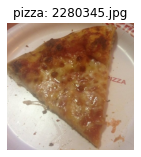

Image shape: (512, 512, 3)


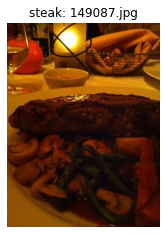

Image shape: (512, 382, 3)


In [46]:

plt.figure(figsize= (5,5))
plt.subplot(1,2, 1)
pizza_img = view_random_image('pizza_steak/train/', 'pizza')

plt.subplot(1,2, 2)
steak_img = view_random_image('pizza_steak/train/', 'steak')

In [82]:
model_4 = Sequential([
    Conv2D(filters = 10, 
           kernel_size = 3, 
           strides = 1,
           padding = 'valid',
           activation = 'relu',
           input_shape = (244,244,3)),
    
    Conv2D(10, 3, activation = 'relu'),
    Conv2D(10, 3, activation = 'relu'),
    Flatten(),
    Dense(1, activation = 'sigmoid')
])

model_4.compile(loss = BinaryCrossentropy(), 
                optimizer = Adam(), 
                metrics = ['accuracy'])

history_4 = model_4.fit(train_data, 
                        epochs = 5, 
                        steps_per_epoch= len(train_data),
                        validation_data= val_data,
                        validation_steps= len(val_data))


Epoch 1/5
47/47 [==============================] - 68s 1s/step - loss: 1.0840 - accuracy: 0.6740 - val_loss: 0.4885 - val_accuracy: 0.7500
Epoch 2/5
47/47 [==============================] - 65s 1s/step - loss: 0.3923 - accuracy: 0.8360 - val_loss: 0.3942 - val_accuracy: 0.8480
Epoch 3/5
47/47 [==============================] - 69s 1s/step - loss: 0.2427 - accuracy: 0.9200 - val_loss: 0.4198 - val_accuracy: 0.8240
Epoch 4/5
47/47 [==============================] - 66s 1s/step - loss: 0.1281 - accuracy: 0.9620 - val_loss: 0.4239 - val_accuracy: 0.8160
Epoch 5/5
47/47 [==============================] - 69s 1s/step - loss: 0.0578 - accuracy: 0.9880 - val_loss: 0.5764 - val_accuracy: 0.7580


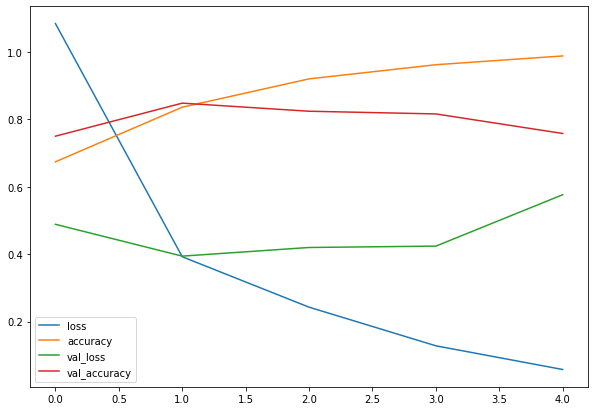

In [84]:
plot(history_4)

Above model is overfitting, so let's try and reduce overfitting by following below steps:

* Data augmentation
* Add regularization (MaxPooling)
* Get more data

In [6]:
tf.random.set_seed(42)


model_5 = Sequential([
    Conv2D(10, 3, activation = 'relu', input_shape = (244,244,3)),
    
    Conv2D(10, 3, activation = 'relu'),
    MaxPool2D(pool_size = 2),
    
    Conv2D(10, 3, activation = 'relu'),
    
    Conv2D(10, 3, activation = 'relu'),
    MaxPool2D(pool_size = 2),
    
    Flatten(),
    Dense(1, activation = 'sigmoid')
])

model_5.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 242, 242, 10)      280       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 240, 240, 10)      910       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 120, 120, 10)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 118, 118, 10)      910       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 116, 116, 10)      910       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 58, 58, 10)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 33640)            

In [87]:
model_5.compile(loss= BinaryCrossentropy(),
               optimizer = Adam(),
               metrics = ['accuracy'])

history_5 = model_5.fit(train_data,
                        epochs= 5,
                        steps_per_epoch= len(train_data),
                        validation_data= val_data,
                        validation_steps= len(val_data))

Epoch 1/5
47/47 [==============================] - 56s 1s/step - loss: 0.5712 - accuracy: 0.7033 - val_loss: 0.4174 - val_accuracy: 0.8300
Epoch 2/5
47/47 [==============================] - 55s 1s/step - loss: 0.4316 - accuracy: 0.8007 - val_loss: 0.3994 - val_accuracy: 0.8120
Epoch 3/5
47/47 [==============================] - 55s 1s/step - loss: 0.3807 - accuracy: 0.8440 - val_loss: 0.3192 - val_accuracy: 0.8620
Epoch 4/5
47/47 [==============================] - 55s 1s/step - loss: 0.3434 - accuracy: 0.8607 - val_loss: 0.3156 - val_accuracy: 0.8520
Epoch 5/5
47/47 [==============================] - 56s 1s/step - loss: 0.3085 - accuracy: 0.8773 - val_loss: 0.3873 - val_accuracy: 0.8300


### Performing Data Augmentation

Data Augmentation is process of altering our training data without the need to collect more data points, leading it to have more diversity and in turn allowing our model to generalize well over unseen test data,i.e, **reduce overfitting**.


**Note:** Validation/Test data should not augmented

In [7]:
# Create ImageDataGenerator with data augmentation

augmented_train_datagen = ImageDataGenerator(rescale= 1./255,
                                           rotation_range= 0.2,
                                           shear_range= 0.2,
                                           zoom_range= 0.2, 
                                           height_shift_range=0.3,
                                           horizontal_flip= True)


augmented_train_data = augmented_train_datagen.flow_from_directory(directory= train_dir, 
                                                                  target_size = (244,244),
                                                                  batch_size = 32,
                                                                  class_mode = 'binary',
                                                                  shuffle = True) 


unaugmented_train_datagen = ImageDataGenerator(rescale= 1./255)
unaugmented_train_data = unaugmented_train_datagen.flow_from_directory(directory = train_dir,
                                              batch_size = 32,
                                              target_size = (244, 244),
                                              class_mode = 'binary',
                                              shuffle = False)

Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.


In [113]:
# Get sample images
images, labels = unaugmented_train_data.next()
aug_images, aug_labels = augmented_train_data.next()

Text(0.5, 1.0, 'Augmented image')

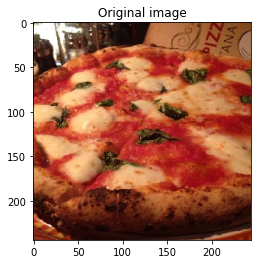

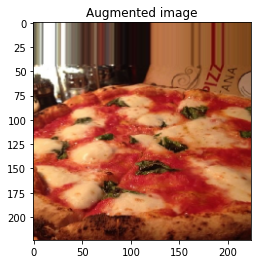

In [125]:
import random

random_num = random.randint(0,33)
plt.imshow(images[random_num])
plt.title('Original image')
# plt.axis(False)
plt.figure()
plt.imshow(aug_images[random_num])
plt.title('Augmented image')

In [8]:
# Set seed
tf.random.set_seed(42)

# Build the model
model_6 = Sequential([
    Conv2D(10, 3, activation = 'relu', input_shape = (244,244, 3)),
    Conv2D(10, 3, activation = 'relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation = 'relu'),
    Conv2D(10, 3, activation = 'relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation = 'sigmoid')
])

model_6.compile(loss = BinaryCrossentropy(),
               optimizer = Adam(),
               metrics = ['accuracy'])

history_6 = model_6.fit(augmented_train_data, 
                        epochs= 5,
                        steps_per_epoch= len(augmented_train_data),
                        validation_data=val_data,
                        validation_steps= len(val_data))

Epoch 1/5
47/47 [==============================] - 58s 1s/step - loss: 0.6295 - accuracy: 0.6460 - val_loss: 0.4667 - val_accuracy: 0.7840
Epoch 2/5
47/47 [==============================] - 56s 1s/step - loss: 0.5067 - accuracy: 0.7400 - val_loss: 0.3890 - val_accuracy: 0.8320
Epoch 3/5
47/47 [==============================] - 55s 1s/step - loss: 0.4894 - accuracy: 0.7680 - val_loss: 0.3790 - val_accuracy: 0.8380
Epoch 4/5
47/47 [==============================] - 57s 1s/step - loss: 0.4689 - accuracy: 0.7793 - val_loss: 0.4360 - val_accuracy: 0.8160
Epoch 5/5
47/47 [==============================] - 55s 1s/step - loss: 0.4555 - accuracy: 0.7913 - val_loss: 0.4520 - val_accuracy: 0.7740


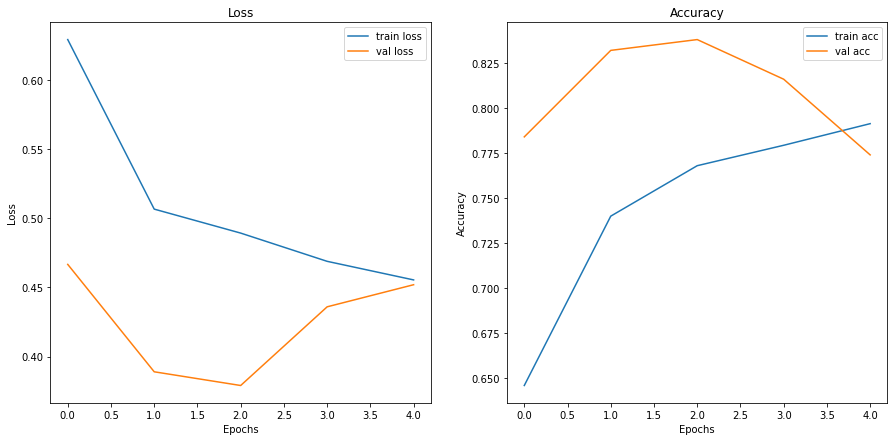

In [11]:
plot_history(history_6)

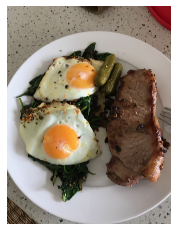

In [16]:
steak = mpimg.imread('images/03-steak.jpeg')
plt.imshow(steak)
plt.axis(False)
plt.show()

### Setup a helper function to process new images(same as would be done when deployed into production env)

In [ ]:
def load_and_prep_image(filename, img_shape = 244):
    """
    Read an image from filename and turns into a tensor
    then reshapes it to (img_shape, img_shape, color_channel)
    """
    
    

In [22]:
# Read in the image
img = tf.io.read_file('images/03-steak.jpeg')

# Decode the read file into tensor
img = tf.image.decode_image(img)

# Resize the image
img = tf.image.resize(img, size = [img_shape, img_shape, 3])

In [28]:
]img = tf.image.resize(img, size = [244, 244])
img.shape

TensorShape([244, 244, 3])